In [1]:
from predict import Point, get_roll, get_yaw, get_pitch, points
from typing import List, Union
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from os import listdir

In [2]:
images = [cv2.imread(f"data/{image}.jpg") for image in range(1,5)]
images.append(cv2.imread("data/straight.png"))


In [3]:
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [4]:
def get_points(target_img, show_all: bool = False) -> Union[bool, List[Point]]:
    result = face_mesh.process(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
    if not result.multi_face_landmarks:
        return False
    _points: List[Point] = []
    if show_all:
        for landmark in result.multi_face_landmarks[0].landmark:
            _point = Point(landmark.x, landmark.y, landmark.z)
            _points.append(_point)
    else:
        for point in points:
            landmark = result.multi_face_landmarks[0].landmark[point]
            _point = Point(landmark.x, landmark.y, landmark.z)
            _points.append(_point)

    return _points

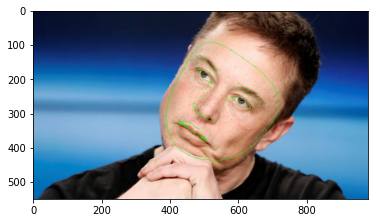

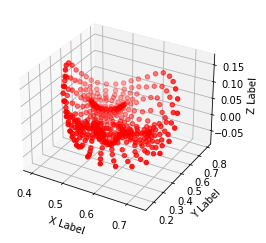

[Point(x=0.6234840154647827, y=0.26348015666007996, z=-0.04315464198589325), Point(x=0.4477599859237671, y=0.7229006886482239, z=0.040659304708242416), Point(x=0.43542999029159546, y=0.34956565499305725, z=0.15988114476203918), Point(x=0.6766655445098877, y=0.6535002589225769, z=0.1267961710691452)]
Roll: 68.71965030731855
Yaw: 132.40674552008787
Pitch: 126.67728107876643

[Point(x=0.4069749712944031, y=0.28833091259002686, z=-0.03385079652070999), Point(x=0.49963706731796265, y=0.5141329765319824, z=0.03234479948878288), Point(x=0.4485735297203064, y=0.37171363830566406, z=0.09451355040073395), Point(x=0.5441497564315796, y=0.3118327856063843, z=-0.005303424317389727)]
Roll: 110.08726869696173
Yaw: 56.72634511827776
Pitch: 153.5960556989877

[Point(x=0.4694632887840271, y=0.2177201211452484, z=-0.00961132813245058), Point(x=0.4423517882823944, y=0.6221652030944824, z=0.00642287777736783), Point(x=0.31468403339385986, y=0.40716925263404846, z=0.06789686530828476), Point(x=0.52910786867

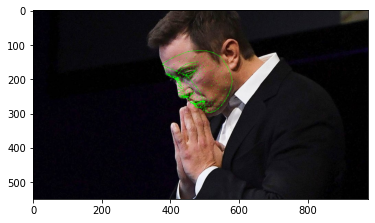

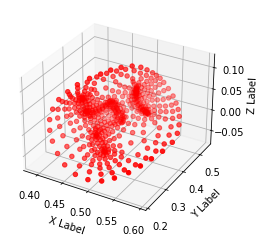

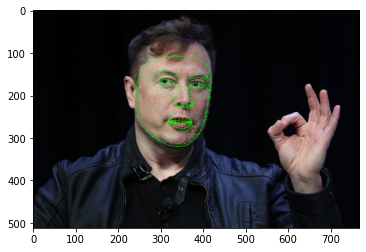

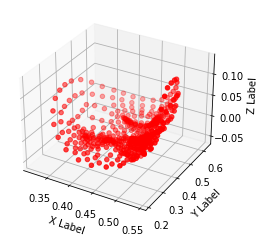

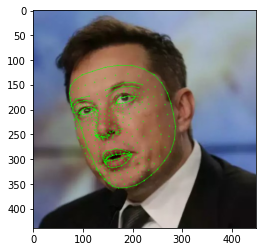

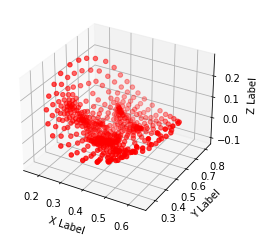

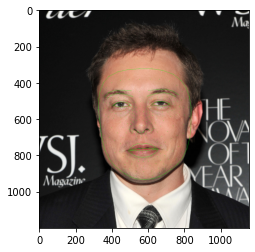

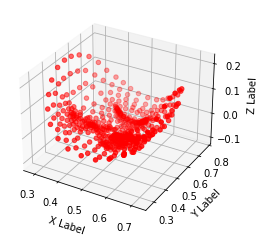

In [5]:
for image in images:
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.multi_face_landmarks:
        continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec
        )
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.show()

    x = [landmark.x for landmark in results.multi_face_landmarks[0].landmark]
    y = [landmark.y for landmark in results.multi_face_landmarks[0].landmark]
    z = [landmark.z for landmark in results.multi_face_landmarks[0].landmark]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

    results = get_points(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    print(results)
    print(f"Roll: {get_roll(results)}")
    print(f"Yaw: {get_yaw(results)}")
    print(f"Pitch: {get_pitch(results)}")
    print()



In [ ]:
# [Point(x=0.47664278745651245, y=0.28286412358283997, z=-0.0037403786554932594), Point(x=0.5007335543632507, y=0.7775087356567383, z=0.006191226188093424), Point(x=0.2925052046775818, y=0.5447610020637512, z=0.20853042602539062), Point(x=0.7170065641403198, y=0.5338471531867981, z=0.18104806542396545)]
